# Importing Liabraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.models import load_model, save_model

# Data Preprocessing

In [66]:
d=pd.read_csv("C:/Users/sahoo/Downloads/heart.csv")
d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Checking for null values

In [67]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
#check for if there any categorical values having the form of object
#because any ML/DL model only accept categorical values if they are in numeric form
d.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [70]:
x=d.drop('target',axis=1).values
y=d['target'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [71]:
y_train.shape,y_test.shape

((227,), (76,))

In [72]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)


In [73]:
y_train.shape,y_test.shape

((227, 1), (76, 1))

# Building ANN Classifier

In [75]:
import tensorflow as tf
mymodel=Sequential()
mymodel.add(Dense(input_dim=13,units=20,activation='relu',))  #output is nothing but output_dim or no of neuron should present in that current layer
mymodel.add(Dense(units=40,activation='relu'))
mymodel.add(Dense(units=60,activation='relu'))
mymodel.add(Dense(units=40,activation='relu'))
mymodel.add(Dense(units=20,activation='relu'))
mymodel.add(Dense(units=10,activation='relu'))
mymodel.add(Dense(units=1,activation='sigmoid'))

mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=mymodel.fit(x,
            y,
            epochs=150,
            validation_data=(x_test,y_test))

Epoch 1/150
10/10 [==============================] - 0s 48ms/step - loss: 10.4497 - accuracy: 0.4554 - val_loss: 1.9651 - val_accuracy: 0.4342
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.9483 - accuracy: 0.4983 - val_loss: 0.8012 - val_accuracy: 0.5526
Epoch 3/150
10/10 [==============================] - 0s 5ms/step - loss: 0.7220 - accuracy: 0.5545 - val_loss: 0.6705 - val_accuracy: 0.6447
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5776 - val_loss: 0.6618 - val_accuracy: 0.6579
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.5644 - val_loss: 0.6533 - val_accuracy: 0.6184
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.6568 - accuracy: 0.6106 - val_loss: 0.6304 - val_accuracy: 0.6447
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6444 - accuracy: 0.6370 - val_loss: 0.6117 - val_accuracy: 0.6974
Epoch 8/150

Epoch 59/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5100 - accuracy: 0.7327 - val_loss: 0.4745 - val_accuracy: 0.7895
Epoch 60/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.7723 - val_loss: 0.4580 - val_accuracy: 0.7500
Epoch 61/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4941 - accuracy: 0.7459 - val_loss: 0.4608 - val_accuracy: 0.7632
Epoch 62/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7624 - val_loss: 0.4525 - val_accuracy: 0.8158
Epoch 63/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4791 - accuracy: 0.7492 - val_loss: 0.4513 - val_accuracy: 0.8026
Epoch 64/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.7558 - val_loss: 0.4382 - val_accuracy: 0.7895
Epoch 65/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7723 - val_loss: 0.4577 - val_accuracy: 0.8026
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.3738 - accuracy: 0.8086 - val_loss: 0.3477 - val_accuracy: 0.8684
Epoch 117/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3873 - accuracy: 0.7921 - val_loss: 0.3652 - val_accuracy: 0.8553
Epoch 118/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3472 - accuracy: 0.8515 - val_loss: 0.3513 - val_accuracy: 0.8553
Epoch 119/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3547 - accuracy: 0.8383 - val_loss: 0.3531 - val_accuracy: 0.8289
Epoch 120/150
10/10 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.8152 - val_loss: 0.3826 - val_accuracy: 0.8158
Epoch 121/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4018 - accuracy: 0.8119 - val_loss: 0.4158 - val_accuracy: 0.7895
Epoch 122/150
10/10 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.8383 - val_loss: 0.3677 - val_accuracy: 0.8684
Epoch 123/150

# Model Loss and Accuracy

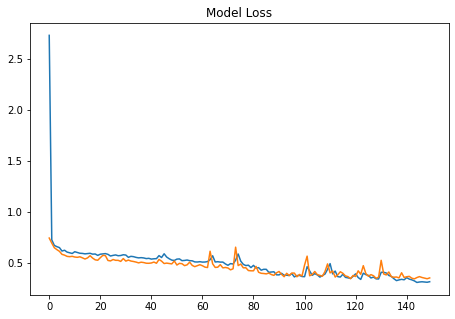

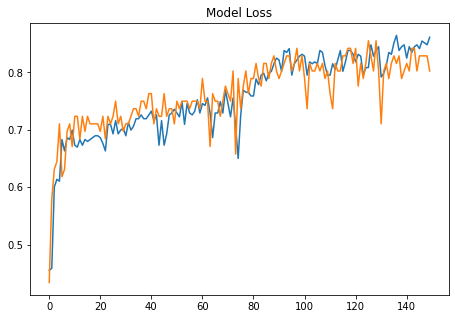

In [53]:
plt.figure(figsize=(7.5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.show()

plt.figure(figsize=(7.5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Loss")
#plt.legend()
plt.show()

## Save model and Predict

In [54]:
mymodel.save("Heart Disease Detec.h5")

In [55]:
cnn1=load_model("Heart Disease Detec.h5")
cnn1

In [88]:
s=cnn1.predict(x_test[10].reshape(1,13))
s

array([[0.99999964]], dtype=float32)

In [89]:
#predict value returns probability of a class it belongs to so finally we set a threshold value through 
#Which it decide to which class that person belongs
#set threshold value :0.5

s>0.5


array([[ True]])

In [90]:
#as we can see above the threshold value means that person has a disease